In [1]:
import pandas as pd
from itertools import combinations
import os
from bidict import bidict
import pickle
import lfp_analysis.LFP_recording as LFP_recording
import lfp_analysis.LFP_collection as LFP_collection
import lfp_analysis.preprocessor as preprocessor
import importlib
importlib.reload(LFP_recording)
importlib.reload(preprocessor)

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

c:\Users\megha\anaconda3\envs\lfp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel(r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\channel_mapping_sme.xlsx")
spike_cols = [col for col in df.columns if 'spike_interface_' in col.lower()]

# Extract brain regions from column names
# Assumes format 'spike_interface_REGION'
brain_regions = [col.split('spike_interface_')[1] for col in spike_cols]

# Create nested dictionary
subject_to_channel_dict = {}

for _, row in df.iterrows():
    subject = row['Subject'].astype(str)
    # Initialize inner dictionary for this subject
    subject_to_channel_dict[subject] = {}
    
    # Populate inner dictionary with brain region: spike value pairs
    for col, region in zip(spike_cols, brain_regions):
        subject_to_channel_dict[subject][region] = int(row[col])
print(subject_to_channel_dict)

{'1.1': {'mPFC': 19, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '1.2': {'mPFC': 26, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '1.3': {'mPFC': 9, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.1': {'mPFC': 15, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.2': {'mPFC': 7, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.3': {'mPFC': 19, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '2.4': {'mPFC': 10, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '3.1': {'mPFC': 25, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '3.2': {'mPFC': 26, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '3.3': {'mPFC': 26, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '4.1': {'mPFC': 25, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}, '4.4': {'mPFC': 25, 'vHPC': 31, 'BLA': 30, 'NAc': 28, 'MD': 29}}


In [3]:
data_path = r'D:\cups\data'
behavior_dicts = unpickle_this("cups_behavior_dicts.pkl")
print(behavior_dicts.keys())
recording_to_subject = {}
recording_to_behavior_dict = {}
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('merged.rec'):
            subject = str(int((file.split("_")[0]))/10)
            
            if subject in behavior_dicts.keys():
                recording_to_subject[file] = subject
                behavior_dict = behavior_dicts[subject]
                recording_to_behavior_dict[file] = behavior_dict


trodes_directory = r"C:\Users\megha\Downloads\Trodes_2-5-2_Windows64\Trodes_2-5-2_Windows64"
            

dict_keys(['1.1', '1.3', '2.1', '2.2', '2.3', '2.4', '3.1', '3.2', '4.1', '4.4'])


In [ ]:
collection = LFP_collection.LFPCollection(recording_to_behavior_dict, subject_to_channel_dict, data_path, recording_to_subject, 4, trodes_directory)
collection.process()

c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\trodes\read_exported.py:168: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


In [ ]:
merged_rec_path = r"D:\cups\data\11_cups_p4.rec\11_cups_p4_merged.rec"
rec_test = LFP_recording.LFPRecording(subject = '1.1', 
                                      behavior_dict=behavior_dicts['1.1'], 
                                      channel_dict=subject_to_channel_dict['1.1'], 
                                      merged_rec_path=merged_rec_path)


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\lfp\trodes\read_exported.py:168: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.dtype(dtype_spec)


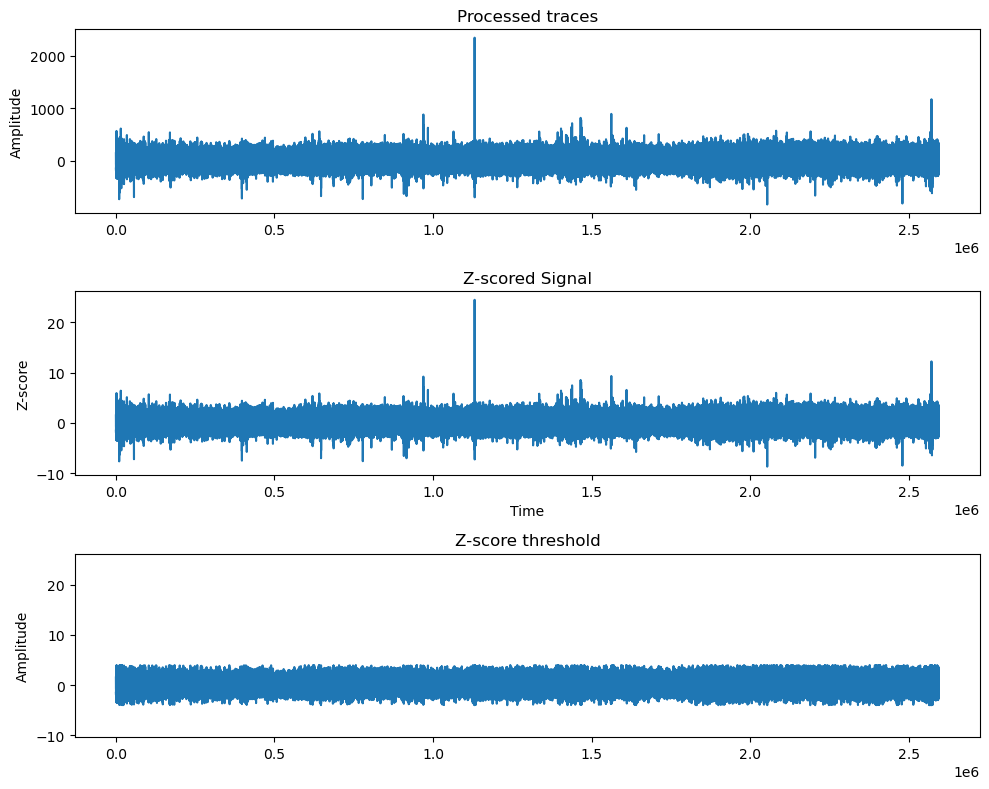

In [ ]:
I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD = 4
rec_test.plot_to_find_threshold(threshold = I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD)

In [ ]:
rec_test.process(I_HAVE_PLOTTED_AND_THIS_LOOKS_GOOD)

(10000, 5)


Text(0, 0.5, 'Power')

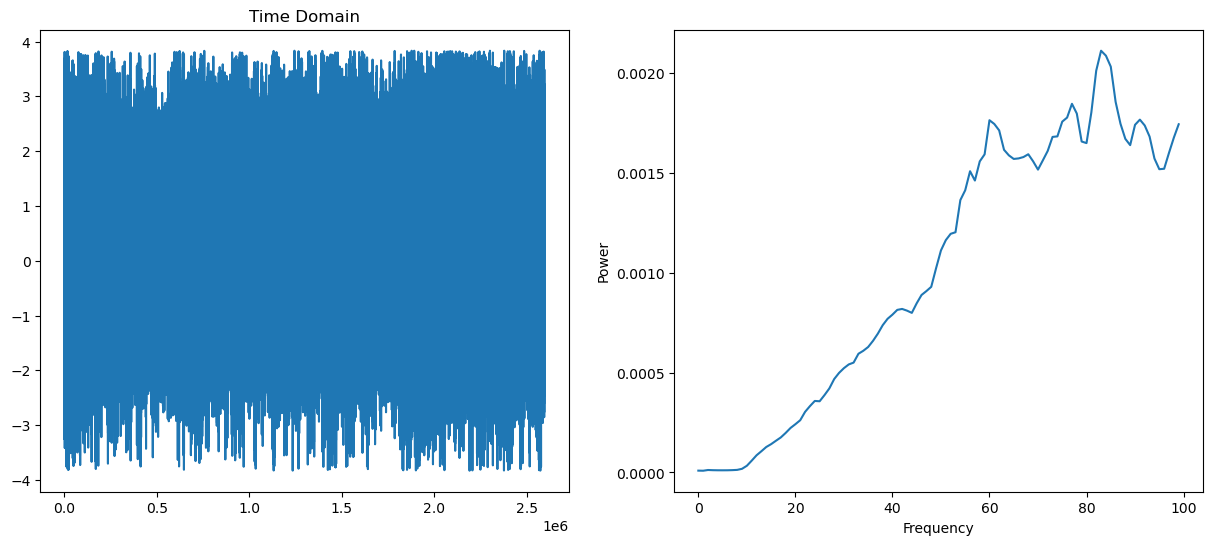

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(rec_test.rms_traces[0].T)
axes[0].set_title("Time Domain")
#connectivity.power.() = [timebins, frequencies, signal]
average_power = np.mean(rec_test.power, axis = 0)
print(average_power.shape)
axes[1].plot(rec_test.frequencies[0:100], average_power[0:100, 0])
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")

In [ ]:
print(rec_test.frequencies[0:5])

[0. 1. 2. 3. 4.]


(10000, 5)


Text(0, 0.5, 'Power')

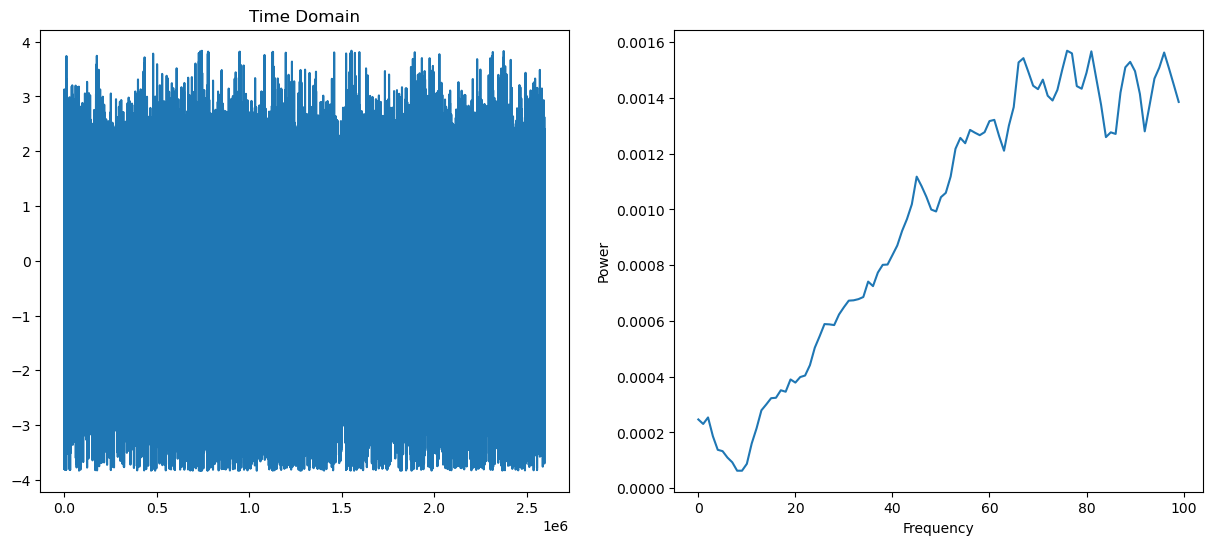

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(rec_test.rms_traces[4].T)
axes[0].set_title("Time Domain")
#connectivity.power.() = [timebins, frequencies, signal]
average_power = np.mean(rec_test.power, axis = 0)
print(average_power.shape)
axes[1].plot(rec_test.frequencies[0:100], average_power[0:100, 4])
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Power")